# **House prices**

A regressão é uma técnica estatística amplamente utilizada, que permite modelar e prever a relação entre variáveis, oferecendo insights valiosos para a compreensão de fenômenos e a tomada de decisões. Neste notebook, é apresentado um trabalho de regressão utilizando a linguagem de programação Python, realizado com o objetivo de prever o preço de casas da cidade de Aimes, em Iowa. Para isso, foi utilizado os dados de treino train.csv disponibilizado pelo Kaggle, plataforma de Aprendizado de Máquina e Ciência de Dados que oferece diversos conjuntos de dados públicos para desafios e análises de dados. Assim, será apresentado as etapas do processo e os resultados obtidos.


## **Imports**

In [348]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#%matplotlib inline
import seaborn as sns

## **Leitura dos dados**

In [339]:
df = pd.read_csv("train.csv")
df = df.drop(["Id"], axis=1) # excluindo a coluna ID
print(df.shape) 
df.head()

(1460, 80)


MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0          60       RL         65.0     8450   Pave   NaN      Reg   
1          20       RL         80.0     9600   Pave   NaN      Reg   
2          60       RL         68.0    11250   Pave   NaN      IR1   
3          70       RL         60.0     9550   Pave   NaN      IR1   
4          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig  ... PoolArea PoolQC Fence MiscFeature  \
0         Lvl    AllPub    Inside  ...        0    NaN   NaN         NaN   
1         Lvl    AllPub       FR2  ...        0    NaN   NaN         NaN   
2         Lvl    AllPub    Inside  ...        0    NaN   NaN         NaN   
3         Lvl    AllPub    Corner  ...        0    NaN   NaN         NaN   
4         Lvl    AllPub       FR2  ...        0    NaN   NaN         NaN   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
0       0      2    2008        WD         Normal     208500  
1       0      5    2007        WD         Normal     181500  
2       0      9    2008        WD         Normal     223500  
3       0      2    2006        WD        Abnorml     140000  
4       0     12    2008        WD         Normal     250000  

[5 rows x 80 columns]

## **AED**

Na etapa inicial, foi conduzida uma Análise Exploratória de Dados (AED) com o objetivo de compreender a estrutura e os padrões presentes nos dados.

In [168]:
# informacoes do dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [169]:
# observando as estatisticas das variaveis numericas
df.describe()

MSSubClass  LotFrontage        LotArea  OverallQual  OverallCond  \
count  1460.000000  1201.000000    1460.000000  1460.000000  1460.000000   
mean     56.897260    70.049958   10516.828082     6.099315     5.575342   
std      42.300571    24.284752    9981.264932     1.382997     1.112799   
min      20.000000    21.000000    1300.000000     1.000000     1.000000   
25%      20.000000    59.000000    7553.500000     5.000000     5.000000   
50%      50.000000    69.000000    9478.500000     6.000000     5.000000   
75%      70.000000    80.000000   11601.500000     7.000000     6.000000   
max     190.000000   313.000000  215245.000000    10.000000     9.000000   

         YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2  ...  \
count  1460.000000   1460.000000  1452.000000  1460.000000  1460.000000  ...   
mean   1971.267808   1984.865753   103.685262   443.639726    46.549315  ...   
std      30.202904     20.645407   181.066207   456.098091   161.319273  ...   
min    1872.000000   1950.000000     0.000000     0.000000     0.000000  ...   
25%    1954.000000   1967.000000     0.000000     0.000000     0.000000  ...   
50%    1973.000000   1994.000000     0.000000   383.500000     0.000000  ...   
75%    2000.000000   2004.000000   166.000000   712.250000     0.000000  ...   
max    2010.000000   2010.000000  1600.000000  5644.000000  1474.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 37 columns]

### **Histogramas**

**Distribuição da variável resposta**

Observando o gráfico abaixo, percebe-se que a variável *SalePrice* possui assimetria à direita ou positiva.

C:\Users\CamilaHiura\Downloads\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


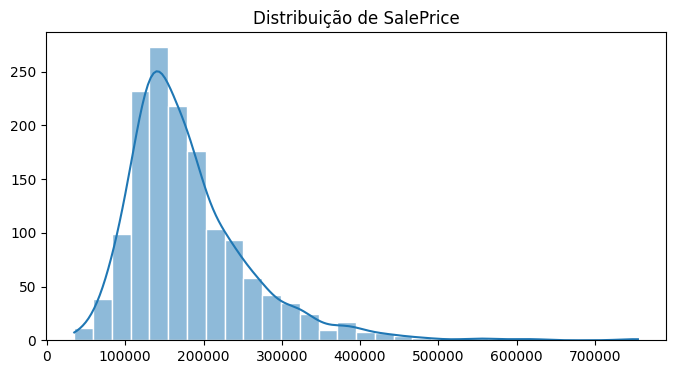

In [92]:
plt.figure(figsize = (8,4))
sns.histplot(df['SalePrice'], kde=True, bins=30, edgecolor = "white")
plt.title("Distribuição de SalePrice")
plt.xlabel('')
plt.ylabel('')
plt.show()

**Distribuição das variáveis numéricas**

As variáveis *LotFrontage*, *BsmtUnfSF*, *TotalBsmtSF*, *1stFlrSF* e *GrLivArea* possuem uma distribuição semelhante a *SalePrice*.

array([[<Axes: title={'center': 'MSSubClass'}>,
        <Axes: title={'center': 'LotFrontage'}>,
        <Axes: title={'center': 'LotArea'}>,
        <Axes: title={'center': 'OverallQual'}>,
        <Axes: title={'center': 'OverallCond'}>,
        <Axes: title={'center': 'YearBuilt'}>],
       [<Axes: title={'center': 'YearRemodAdd'}>,
        <Axes: title={'center': 'MasVnrArea'}>,
        <Axes: title={'center': 'BsmtFinSF1'}>,
        <Axes: title={'center': 'BsmtFinSF2'}>,
        <Axes: title={'center': 'BsmtUnfSF'}>,
        <Axes: title={'center': 'TotalBsmtSF'}>],
       [<Axes: title={'center': '1stFlrSF'}>,
        <Axes: title={'center': '2ndFlrSF'}>,
        <Axes: title={'center': 'LowQualFinSF'}>,
        <Axes: title={'center': 'GrLivArea'}>,
        <Axes: title={'center': 'BsmtFullBath'}>,
        <Axes: title={'center': 'BsmtHalfBath'}>],
       [<Axes: title={'center': 'FullBath'}>,
        <Axes: title={'center': 'HalfBath'}>,
        <Axes: title={'center': 'Bedroo

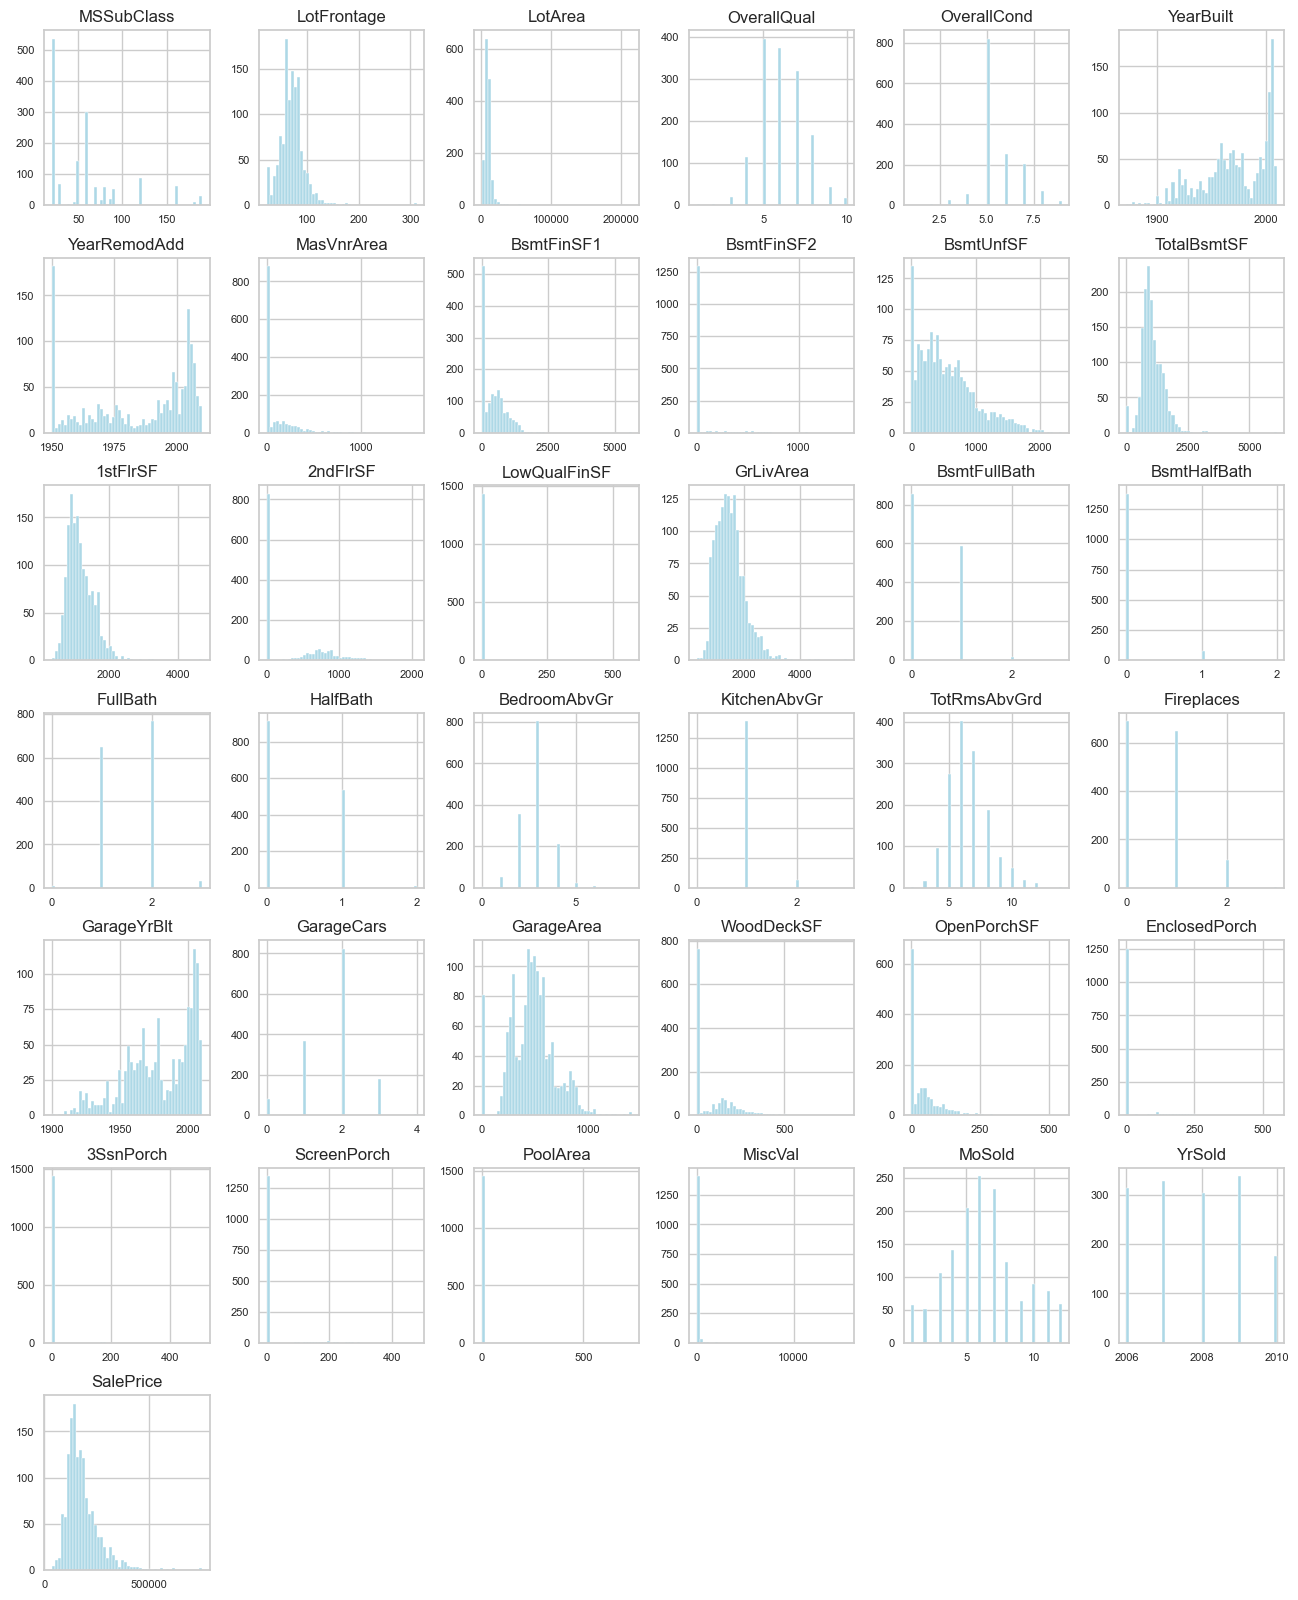

In [171]:
df.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8, color = "lightblue")

### **Boxplot**

**Variável resposta**

<Axes: >

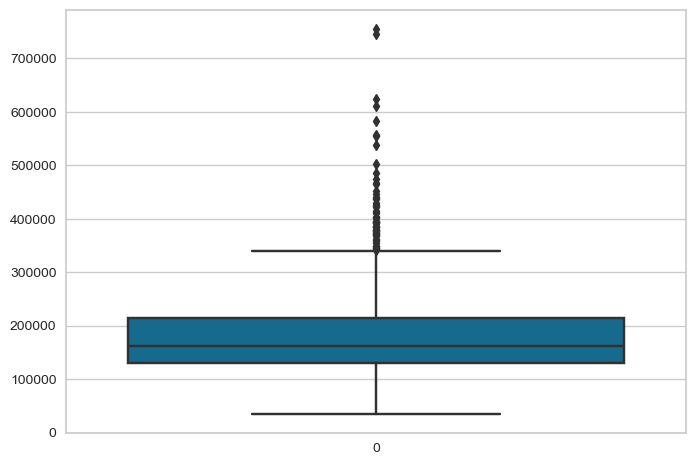

In [173]:
sns.boxplot(df["SalePrice"])

**Variáveis numéricas**

In [36]:
# separando as colunas em categoricas e numericas
categoricas = df.select_dtypes(include=["object"])
numericas = df.select_dtypes(include=["number"])

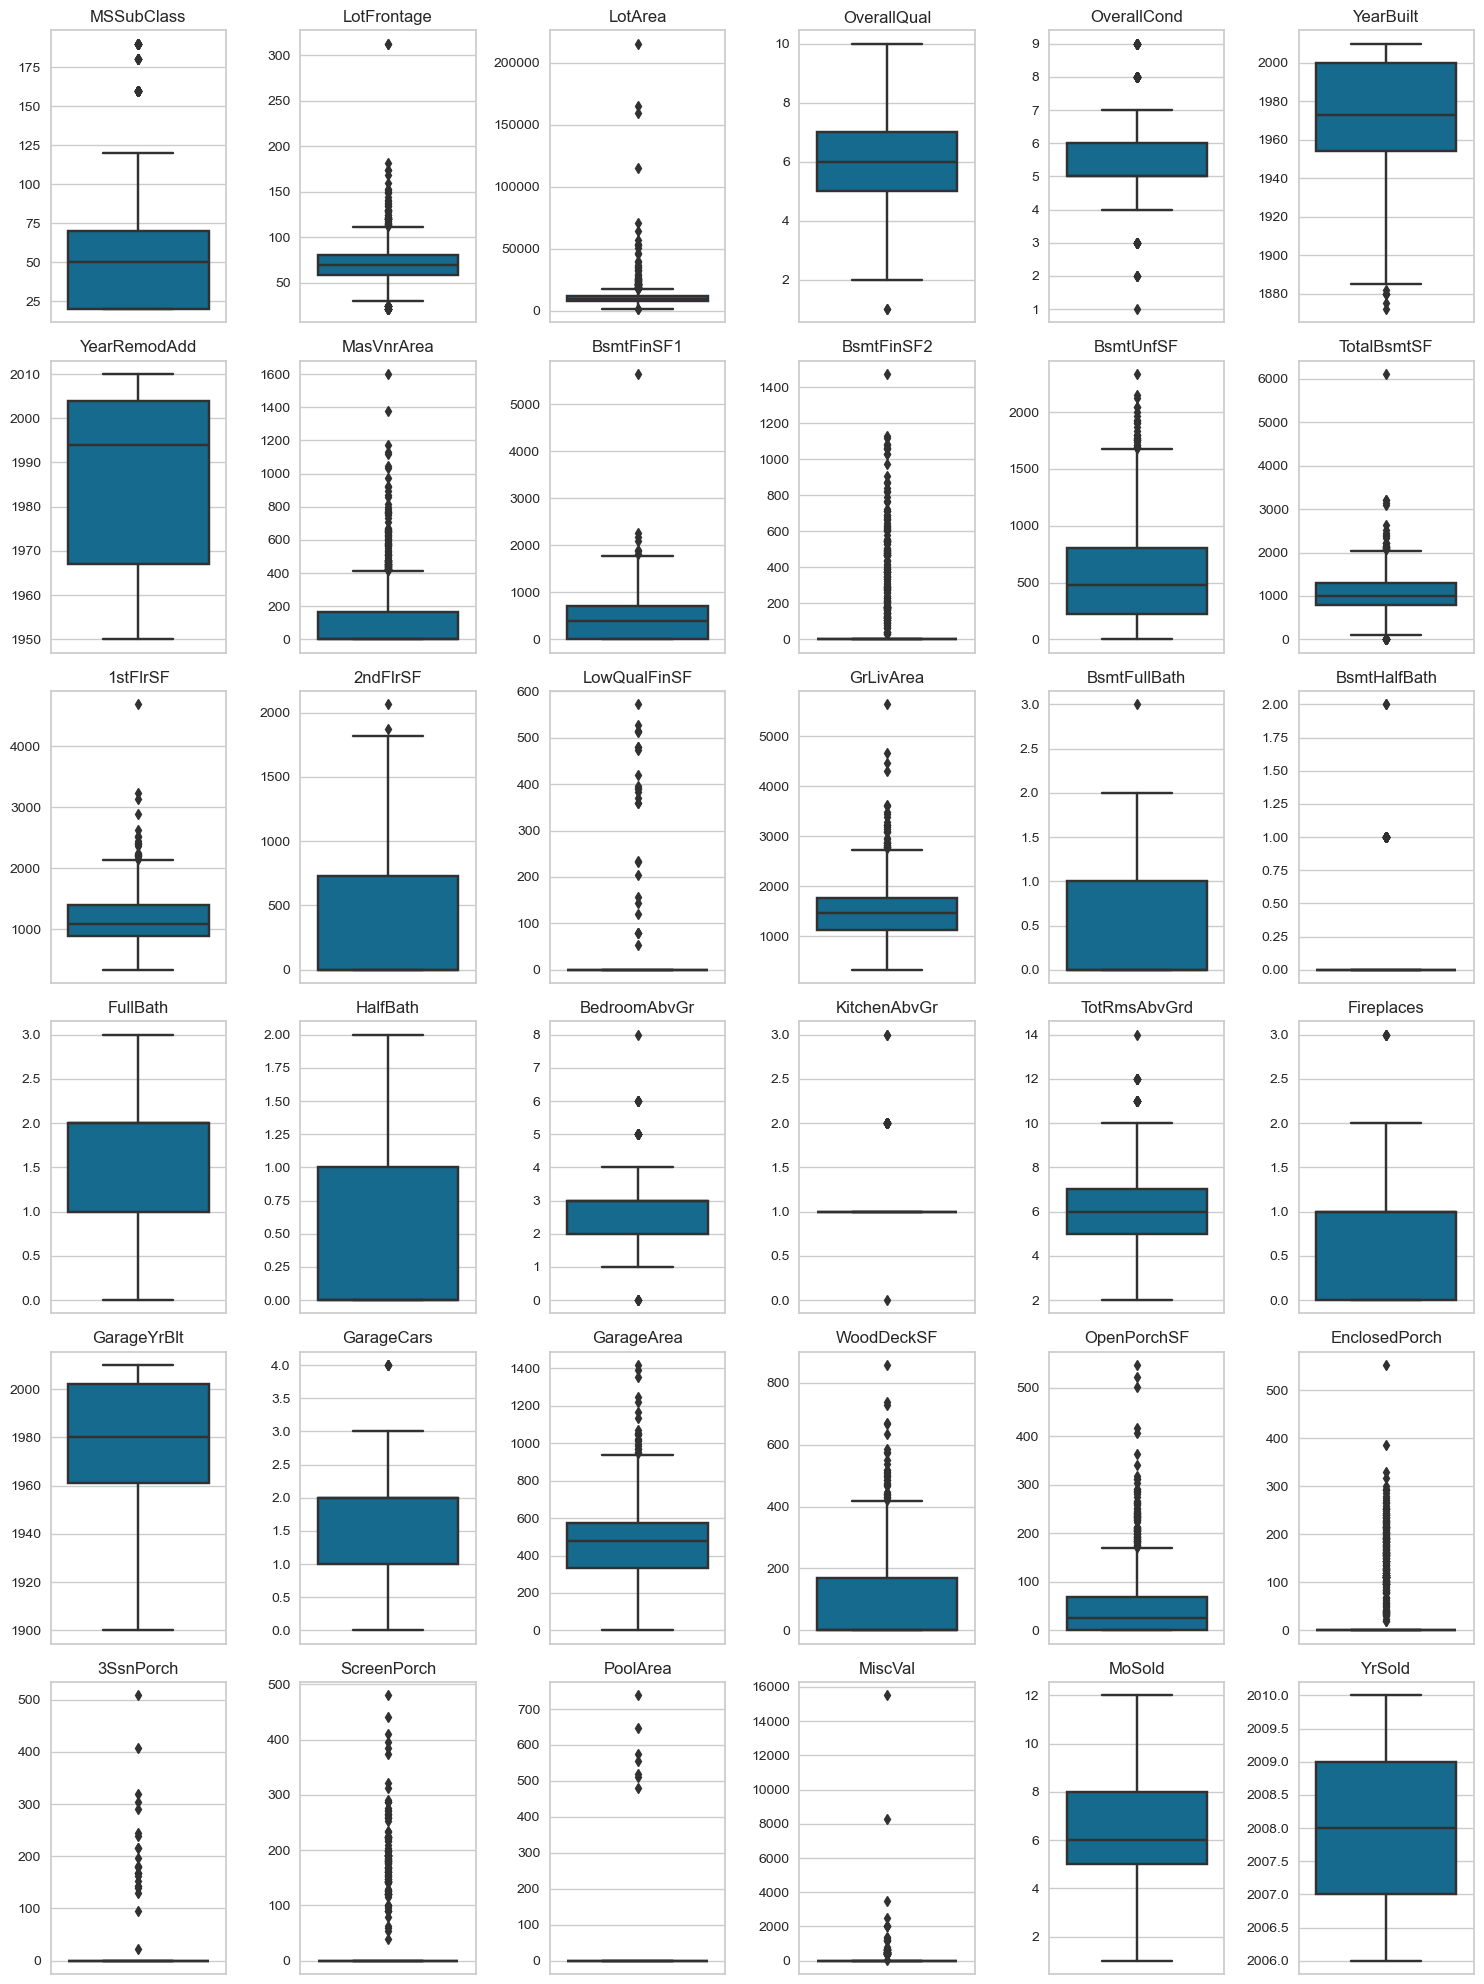

In [103]:
# criando subplots
fig, axes = plt.subplots(6, 6, figsize=(15, 20))

# iterando sobre as colunas numericas e criando os boxplots
for i, column in enumerate(numericas):
    row = i // 6
    col = i % 6
    sns.boxplot(data = numericas, y = column, ax=axes[row, col])
    axes[row, col].set_xlabel("")
    axes[row, col].set_ylabel("")
    axes[row, col].set_title(column)
    

plt.tight_layout()
plt.show()

**Variáveis categóricas**

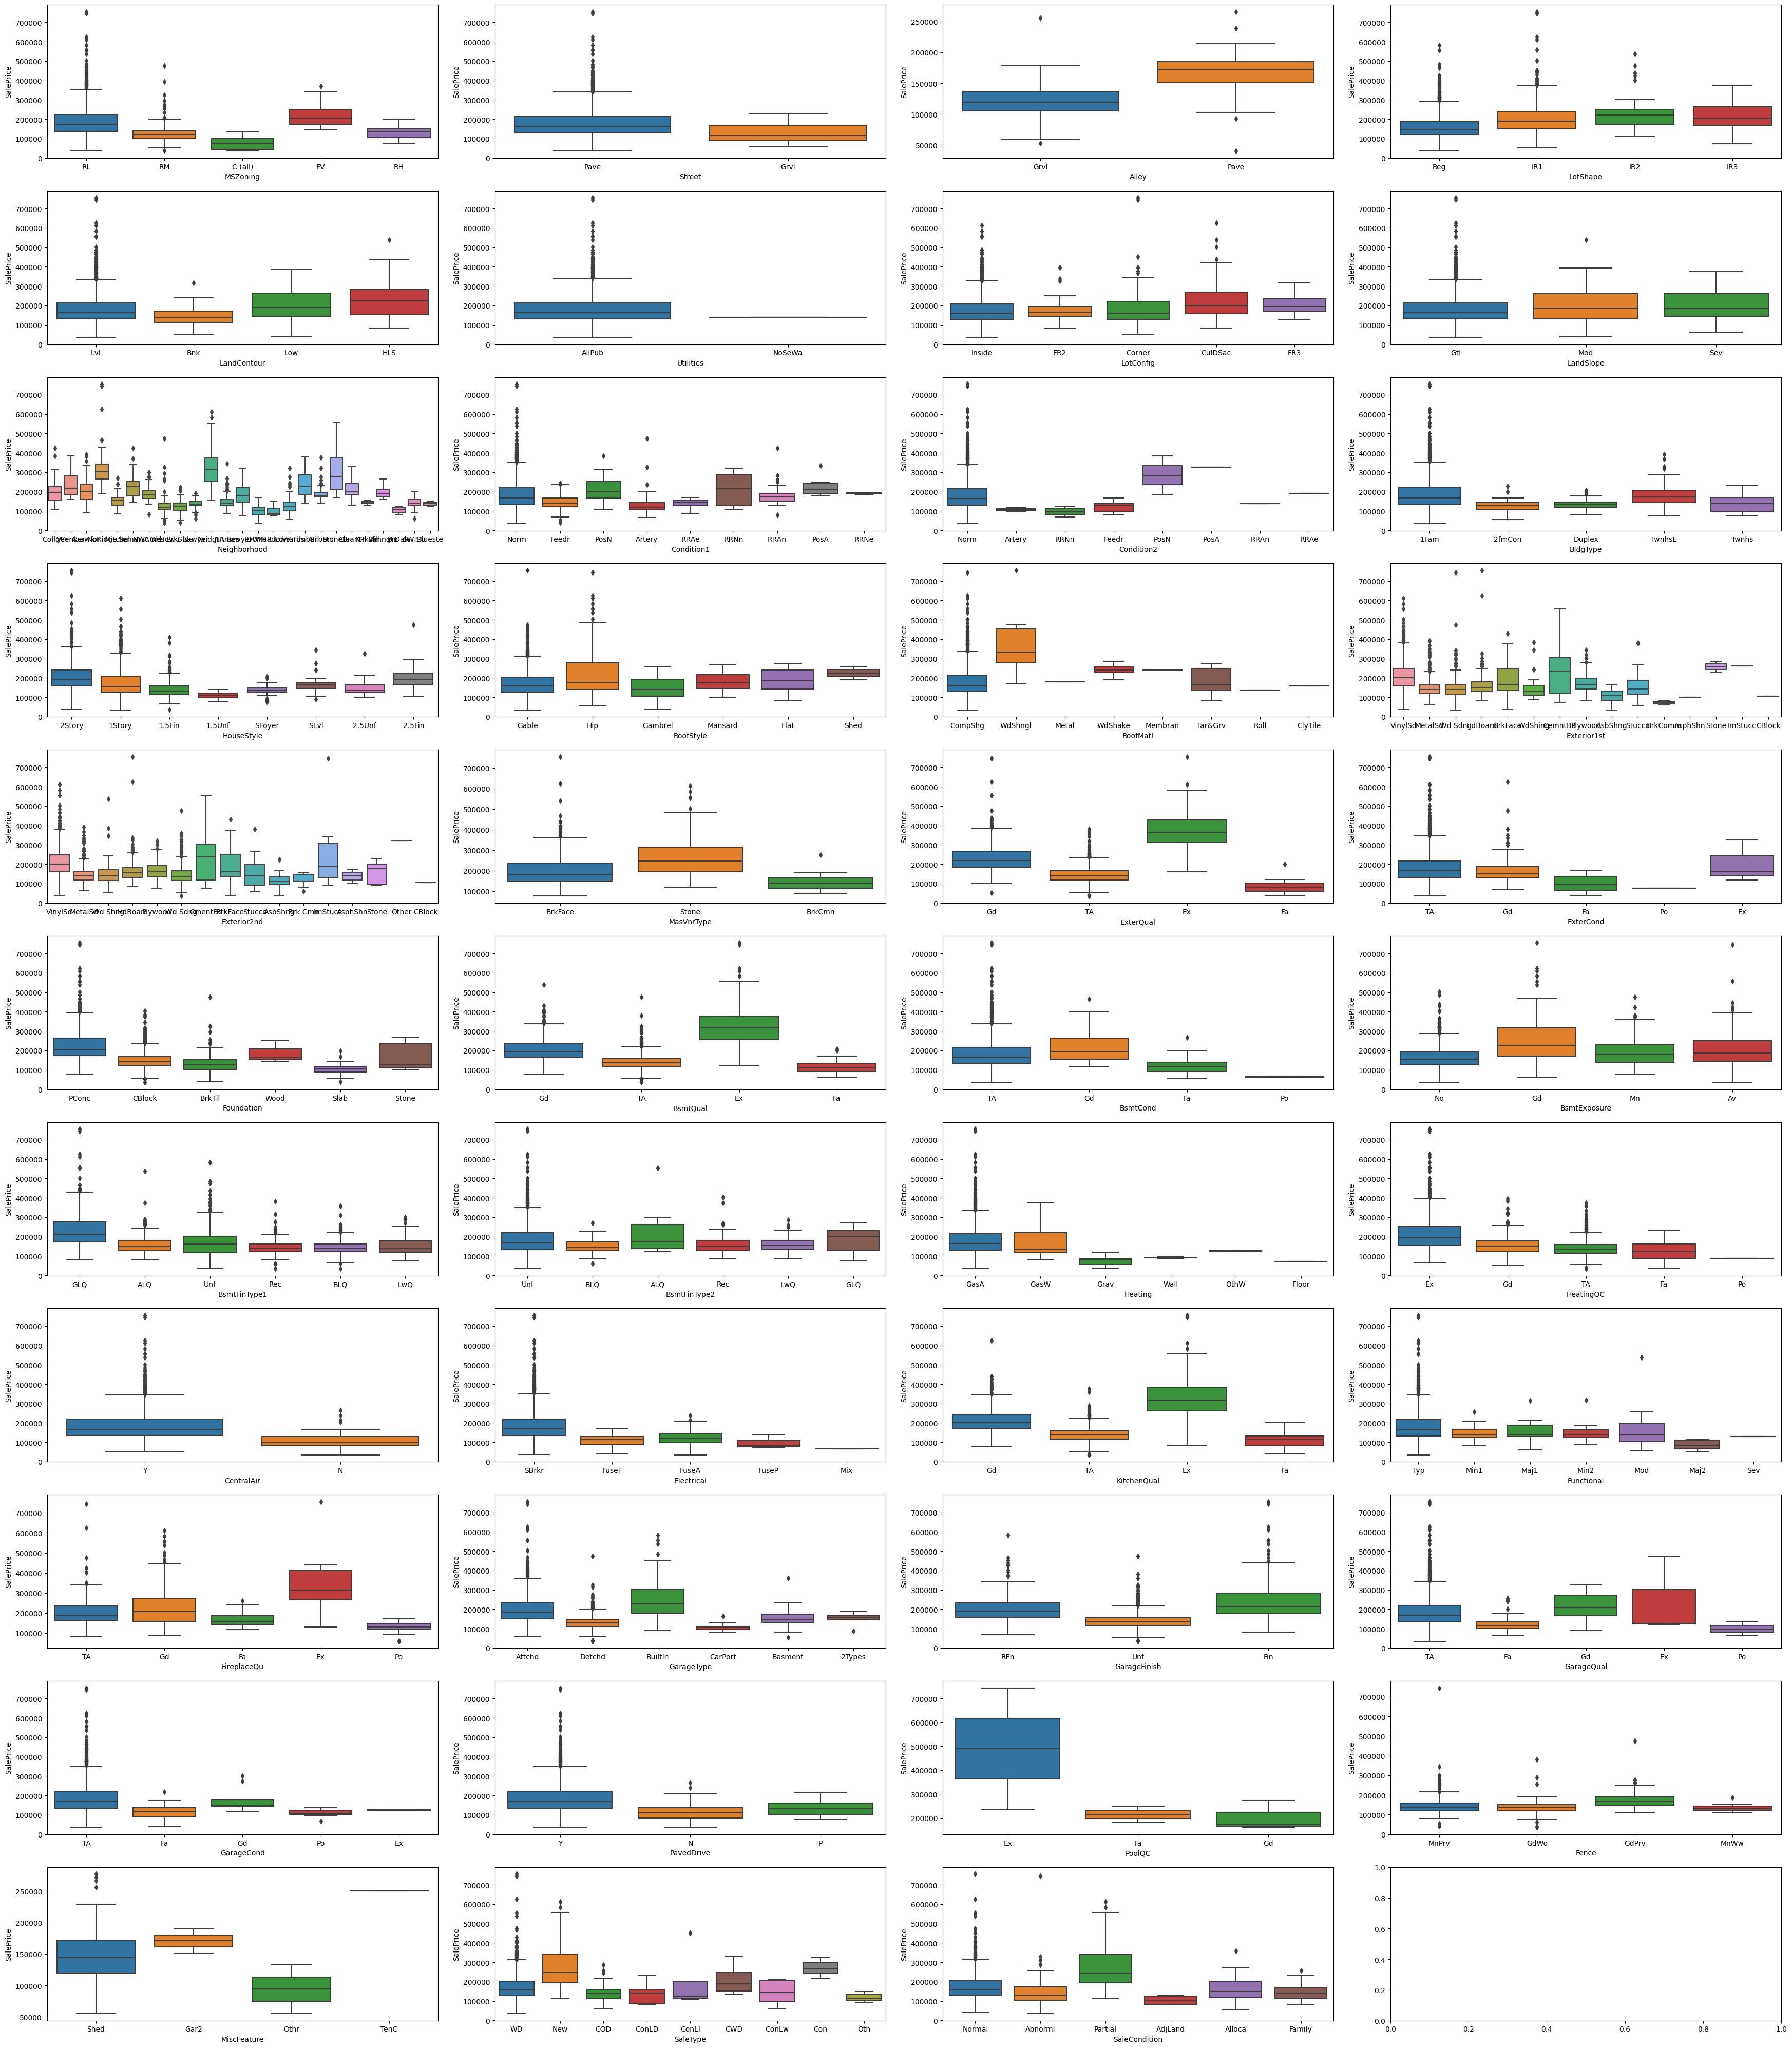

In [37]:
# criando subplots
fig, axes = plt.subplots(11, 4, figsize=(35, 40))

# iterando sobre as colunas categoricas e criando os boxplots
for i, column in enumerate(categoricas):
    row = i // 4
    col = i % 4
    sns.boxplot(data=df, x=column, y="SalePrice", ax=axes[row, col])


plt.tight_layout()
plt.show()

### **Gráfico de dispersão**

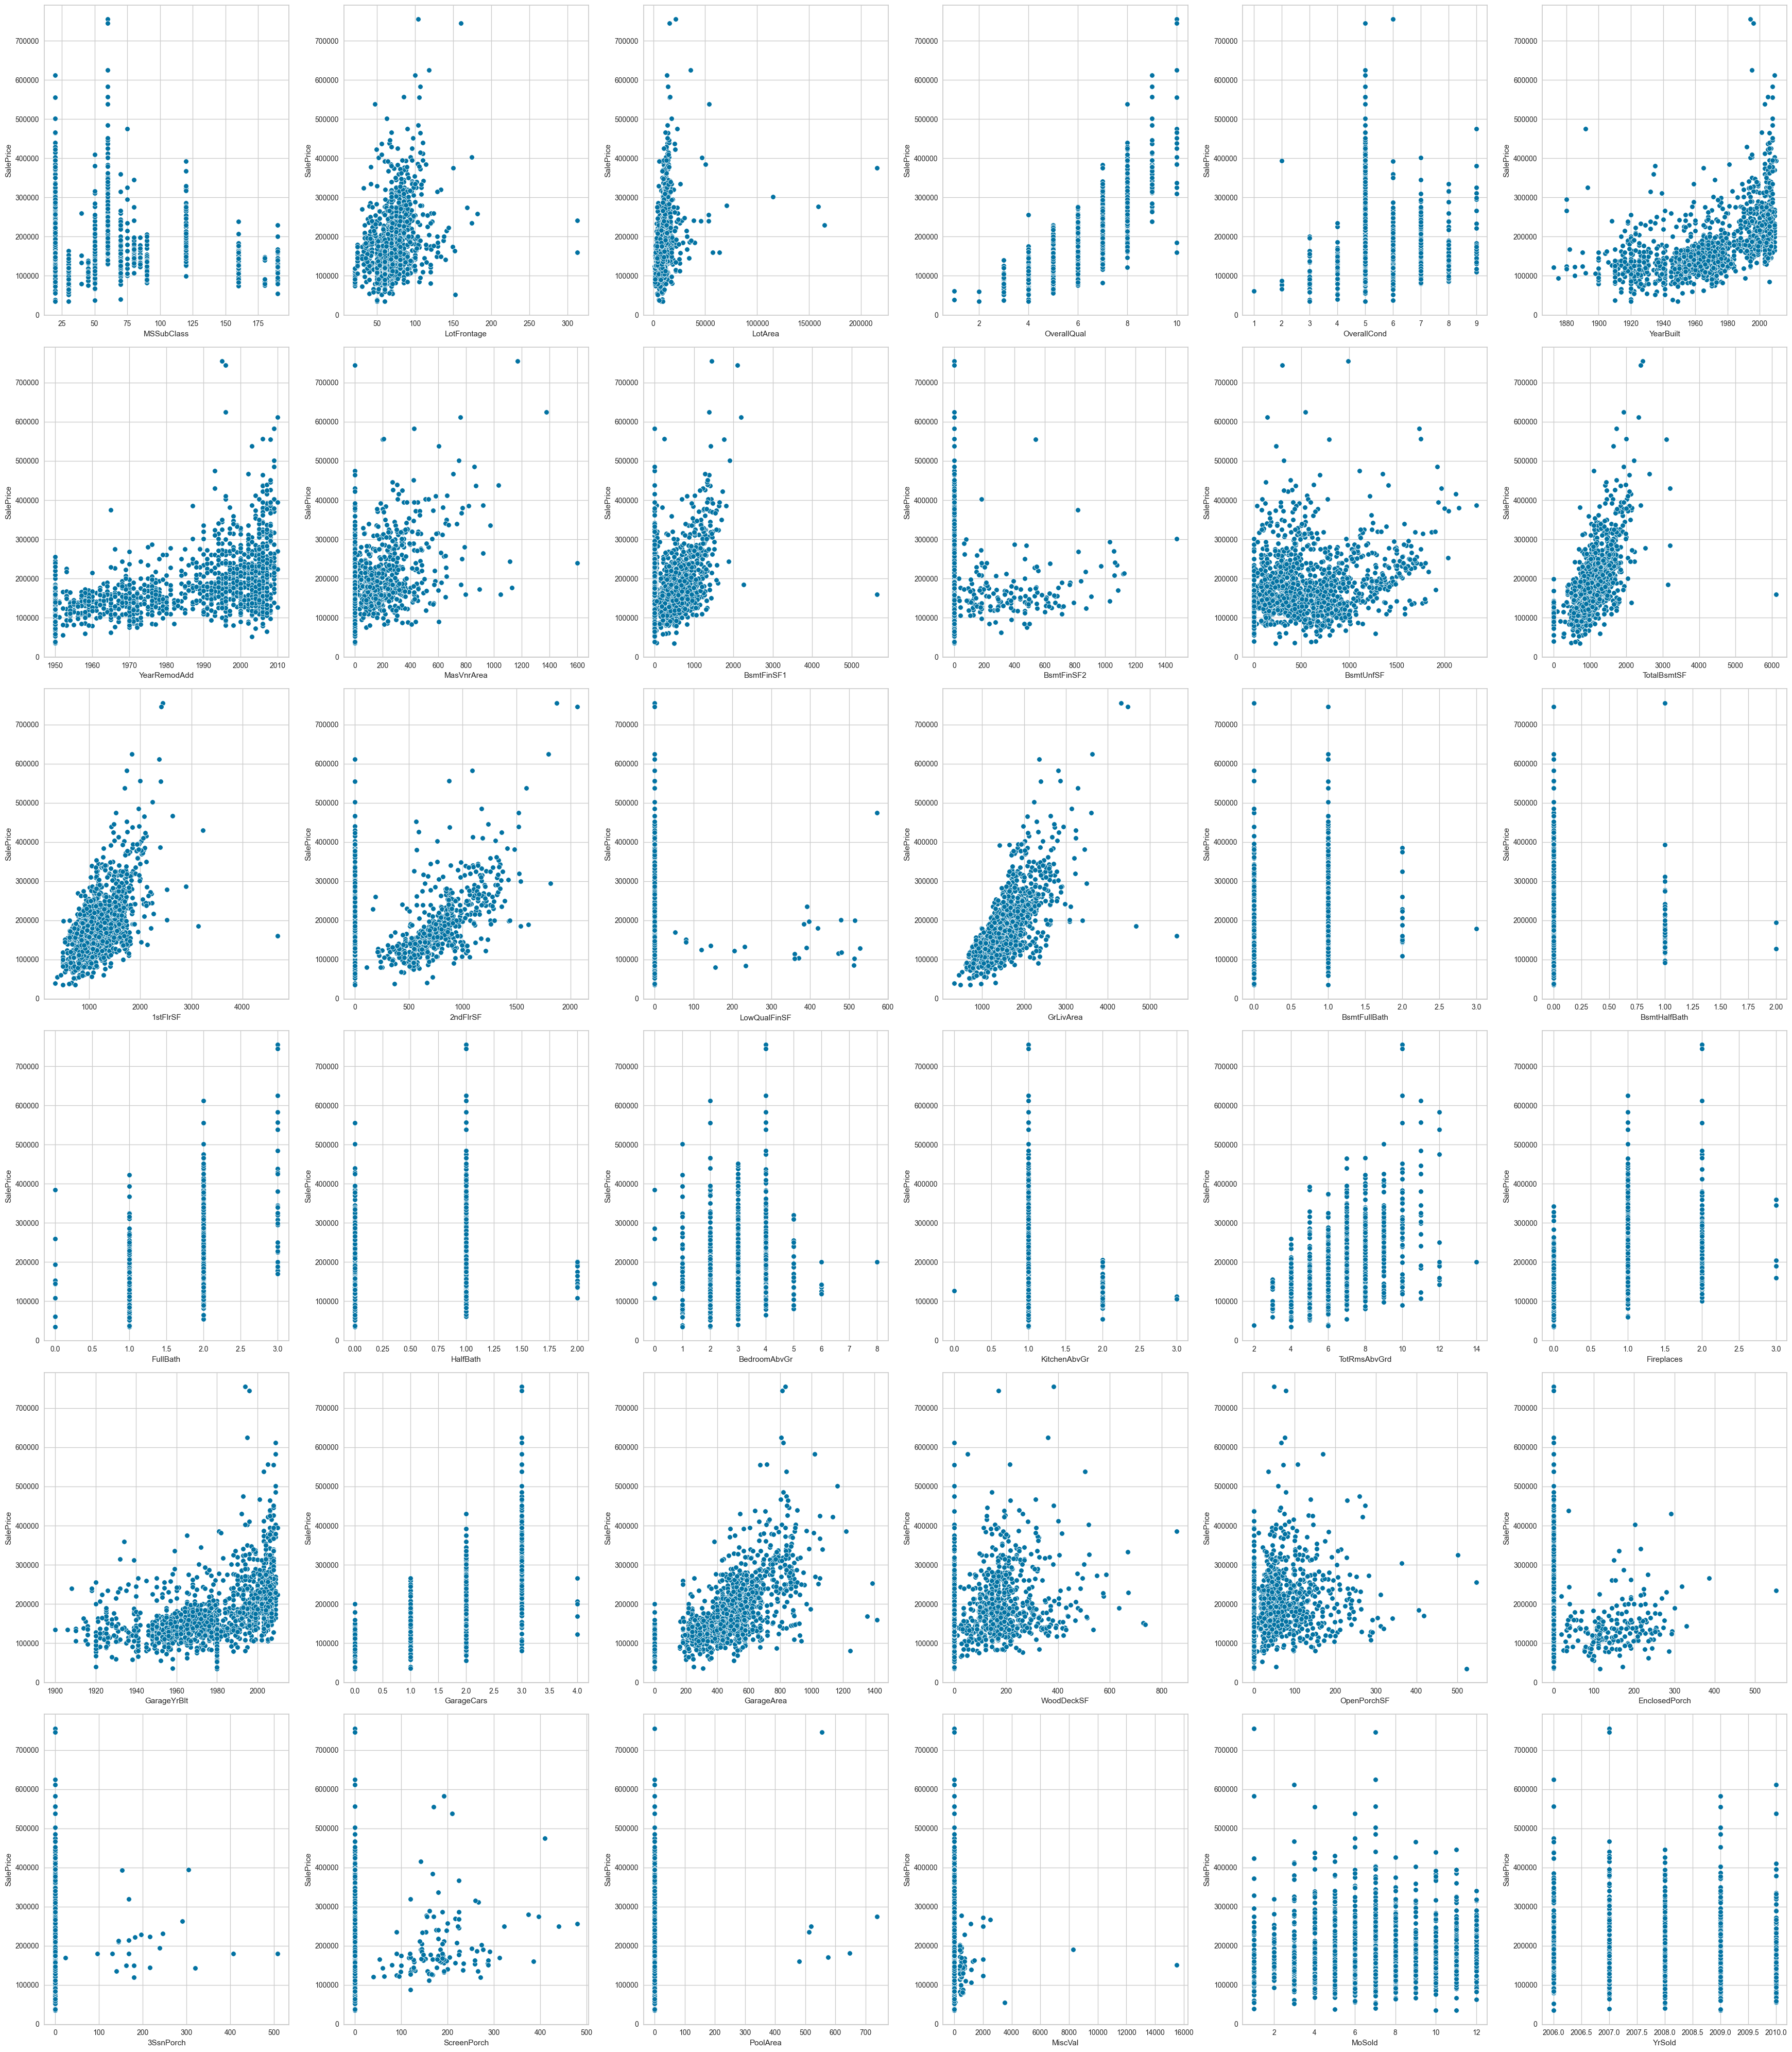

In [202]:
fig, axes = plt.subplots(6, 6, figsize=(35, 40))

# iterando sobre as colunas "object" e criando os boxplots
for i, column in enumerate(numericas):
    row = i // 6
    col = i % 6
    if row < 6 and col < 6:  # Verifica se o índice está dentro dos limites
        sns.scatterplot(data=df, x=column, y="SalePrice", ax=axes[row, col])

plt.tight_layout()
plt.show()

### **Gráfico de linha**

**YearBuilt**

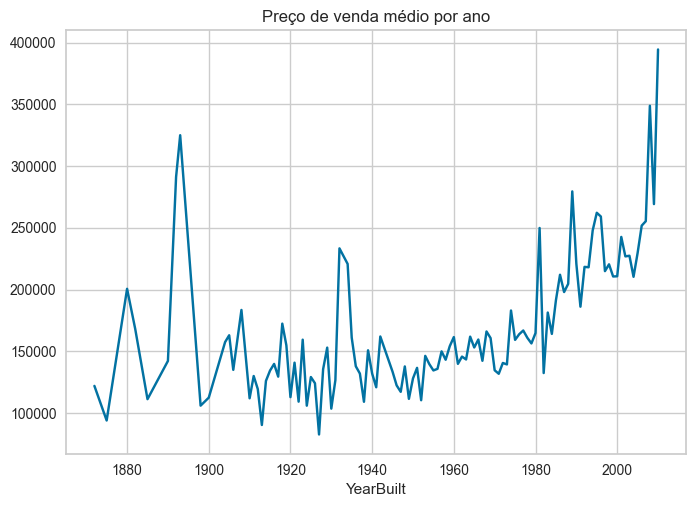

In [208]:
average_saleprice_by_year = df.groupby("YearBuilt")["SalePrice"].mean()
average_saleprice_by_year.plot()
plt.xticks()
plt.title("Preço de venda médio por ano")
plt.show()

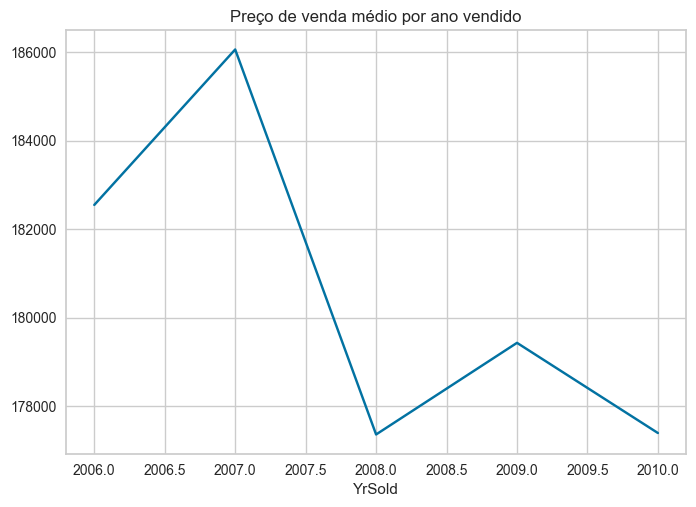

In [205]:
average_saleprice_by_year = df.groupby("YrSold")["SalePrice"].mean()
average_saleprice_by_year.plot()
plt.xticks()
plt.title("Preço de venda médio por ano vendido")
plt.show()

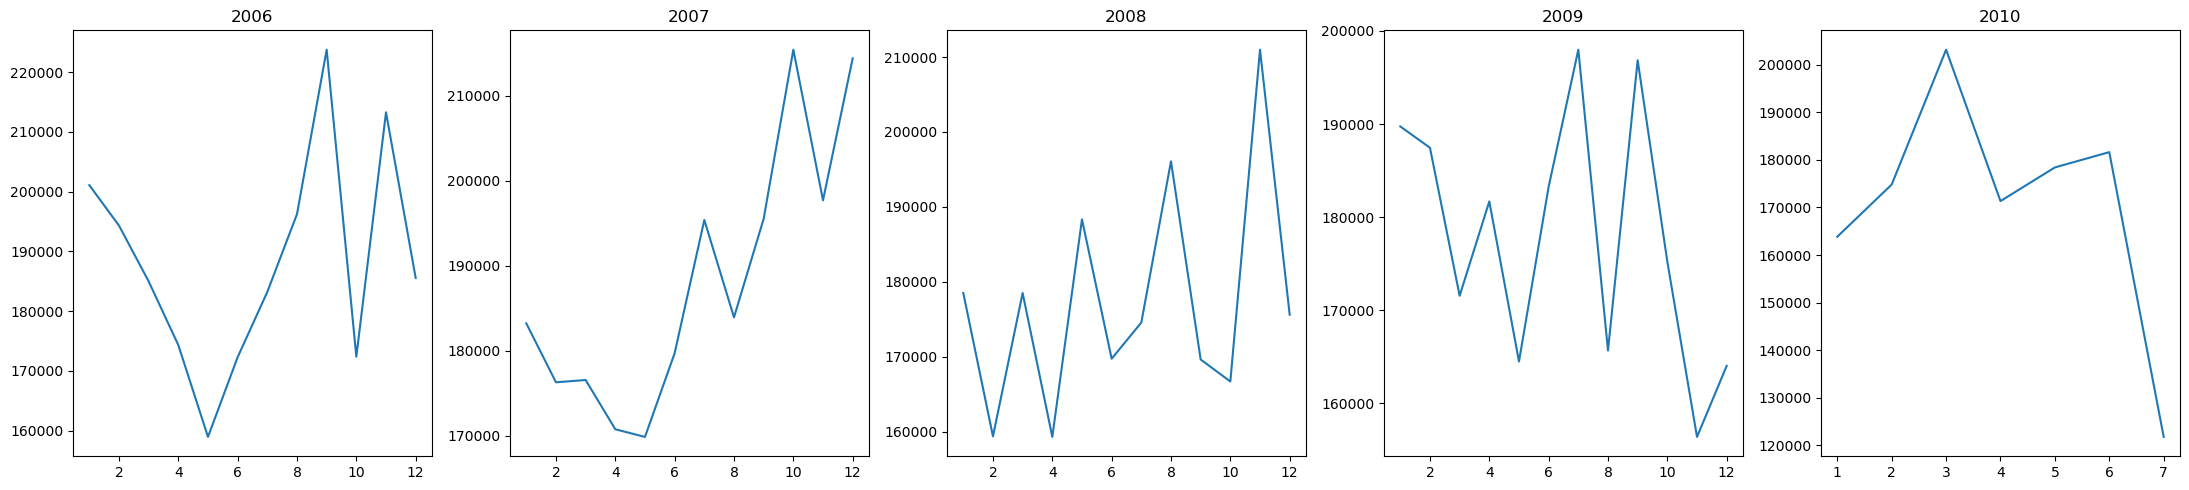

In [105]:
fig, ax = plt.subplots(nrows=1, ncols=5, figsize = (22,5))

for idx, year in enumerate(sorted(df["YrSold"].unique())):
    df_ano = df[df["YrSold"]==year]
    average_saleprice_by_month = df_ano.groupby("MoSold")["SalePrice"].mean()
    ax[idx].plot(average_saleprice_by_month.index, average_saleprice_by_month.values, label = str(year))
    ax[idx].set_title(year)
plt.tight_layout()
plt.show()

## Pré processamento dos dados

### **Linhas duplicadas**

In [153]:
df.duplicated().sum()

0

### **Missing values**

Foi criada uma tabela para analisar a distribuição dos valores ausentes (NaN) no conjunto de dados. A tabela apresenta a quantidade absoluta e a porcentagem de valores NaN.

In [127]:
# quantidade e porcentagem de valores nan por coluna
qnt_nulos = df.isna().sum()[df.isna().sum()>0]
porcentagem_nulos = round(df.isna().sum()[df.isna().sum()>0]/len(df)*100,2)

nulos = pd.DataFrame({"Quantidade": qnt_nulos, "Porcentagem": porcentagem_nulos})
nulos.sort_values(by=['Porcentagem'], ascending=False)

Quantidade  Porcentagem
PoolQC              1453        99.52
MiscFeature         1406        96.30
Alley               1369        93.77
Fence               1179        80.75
MasVnrType           872        59.73
FireplaceQu          690        47.26
LotFrontage          259        17.74
GarageType            81         5.55
GarageYrBlt           81         5.55
GarageFinish          81         5.55
GarageQual            81         5.55
GarageCond            81         5.55
BsmtFinType2          38         2.60
BsmtExposure          38         2.60
BsmtFinType1          37         2.53
BsmtCond              37         2.53
BsmtQual              37         2.53
MasVnrArea             8         0.55
Electrical             1         0.07

-  As variáveis *PoolQC, MiscFeature, Alley, Fence, MasVnrType, FireplaceQu, GarageType, GarageFinish, GarageQual, GarageCond, BsmtFinType2, BsmtExposure, BsmtFinType1, BsmtCond e BsmtQual* são variáveis categóricas que possuem valores nan. No entanto, pelo *data_description* fornecido pelo desafio esses valores nan podem corresponder a ausência de determinadas características em algumas casas e não apenas a falta de dado.

-  A variável *Electrical* é uma variável categórica com valores nan.

-  As variáveis *GarageYrBlt*, *LotFrontage* e *MasVnrArea* são variáveis numéricas com valores nan.

**Substituindo os valores NaN**

In [349]:
# variaveis categoricas em que nan representa a possivel ausencia da feature
# substituindo por None
df['PoolQC'].fillna('None', inplace=True)
df['MiscFeature'].fillna('None', inplace=True)
df['Alley'].fillna('None', inplace=True)
df['Fence'].fillna('None', inplace=True)
df['MasVnrType'].fillna('None', inplace=True)
df['FireplaceQu'].fillna('None', inplace=True)
df['GarageType'].fillna('None', inplace=True)
df['GarageFinish'].fillna('None', inplace=True)
df['GarageQual'].fillna('None', inplace=True)
df['GarageCond'].fillna('None', inplace=True)
df['BsmtFinType2'].fillna('None', inplace=True)
df['BsmtExposure'].fillna('None', inplace=True)
df['BsmtFinType1'].fillna('None', inplace=True)
df['BsmtCond'].fillna('None', inplace=True)
df['BsmtQual'].fillna('None', inplace=True)

In [350]:
# variavel categorica
# substituindo pela moda
df['Electrical'].fillna(df['Electrical'].mode()[0], inplace=True)

In [351]:
# variavel numerica
# substituindo pela mediana
median_size = df['LotFrontage'].median()
df['LotFrontage'].fillna(median_size, inplace=True)

In [352]:
# variavel numerica
# substituindo pela mediana
median_size = df['MasVnrArea'].median()
df['MasVnrArea'].fillna(median_size, inplace=True)

In [353]:
# variavel numerica
# substituindo pela mediana
median_size = df["GarageYrBlt"].median()
df["GarageYrBlt"].fillna(median_size, inplace=True)
df['GarageYrBlt'] = df['GarageYrBlt'].astype(int) # transformar coluna em int

**Transformando variáveis categóricas em numéricas**

In [354]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
for col in df.columns:
    if df[col].dtype == "object":
        df[col]=label_encoder.fit_transform(df[col])

**Matriz de correlação**

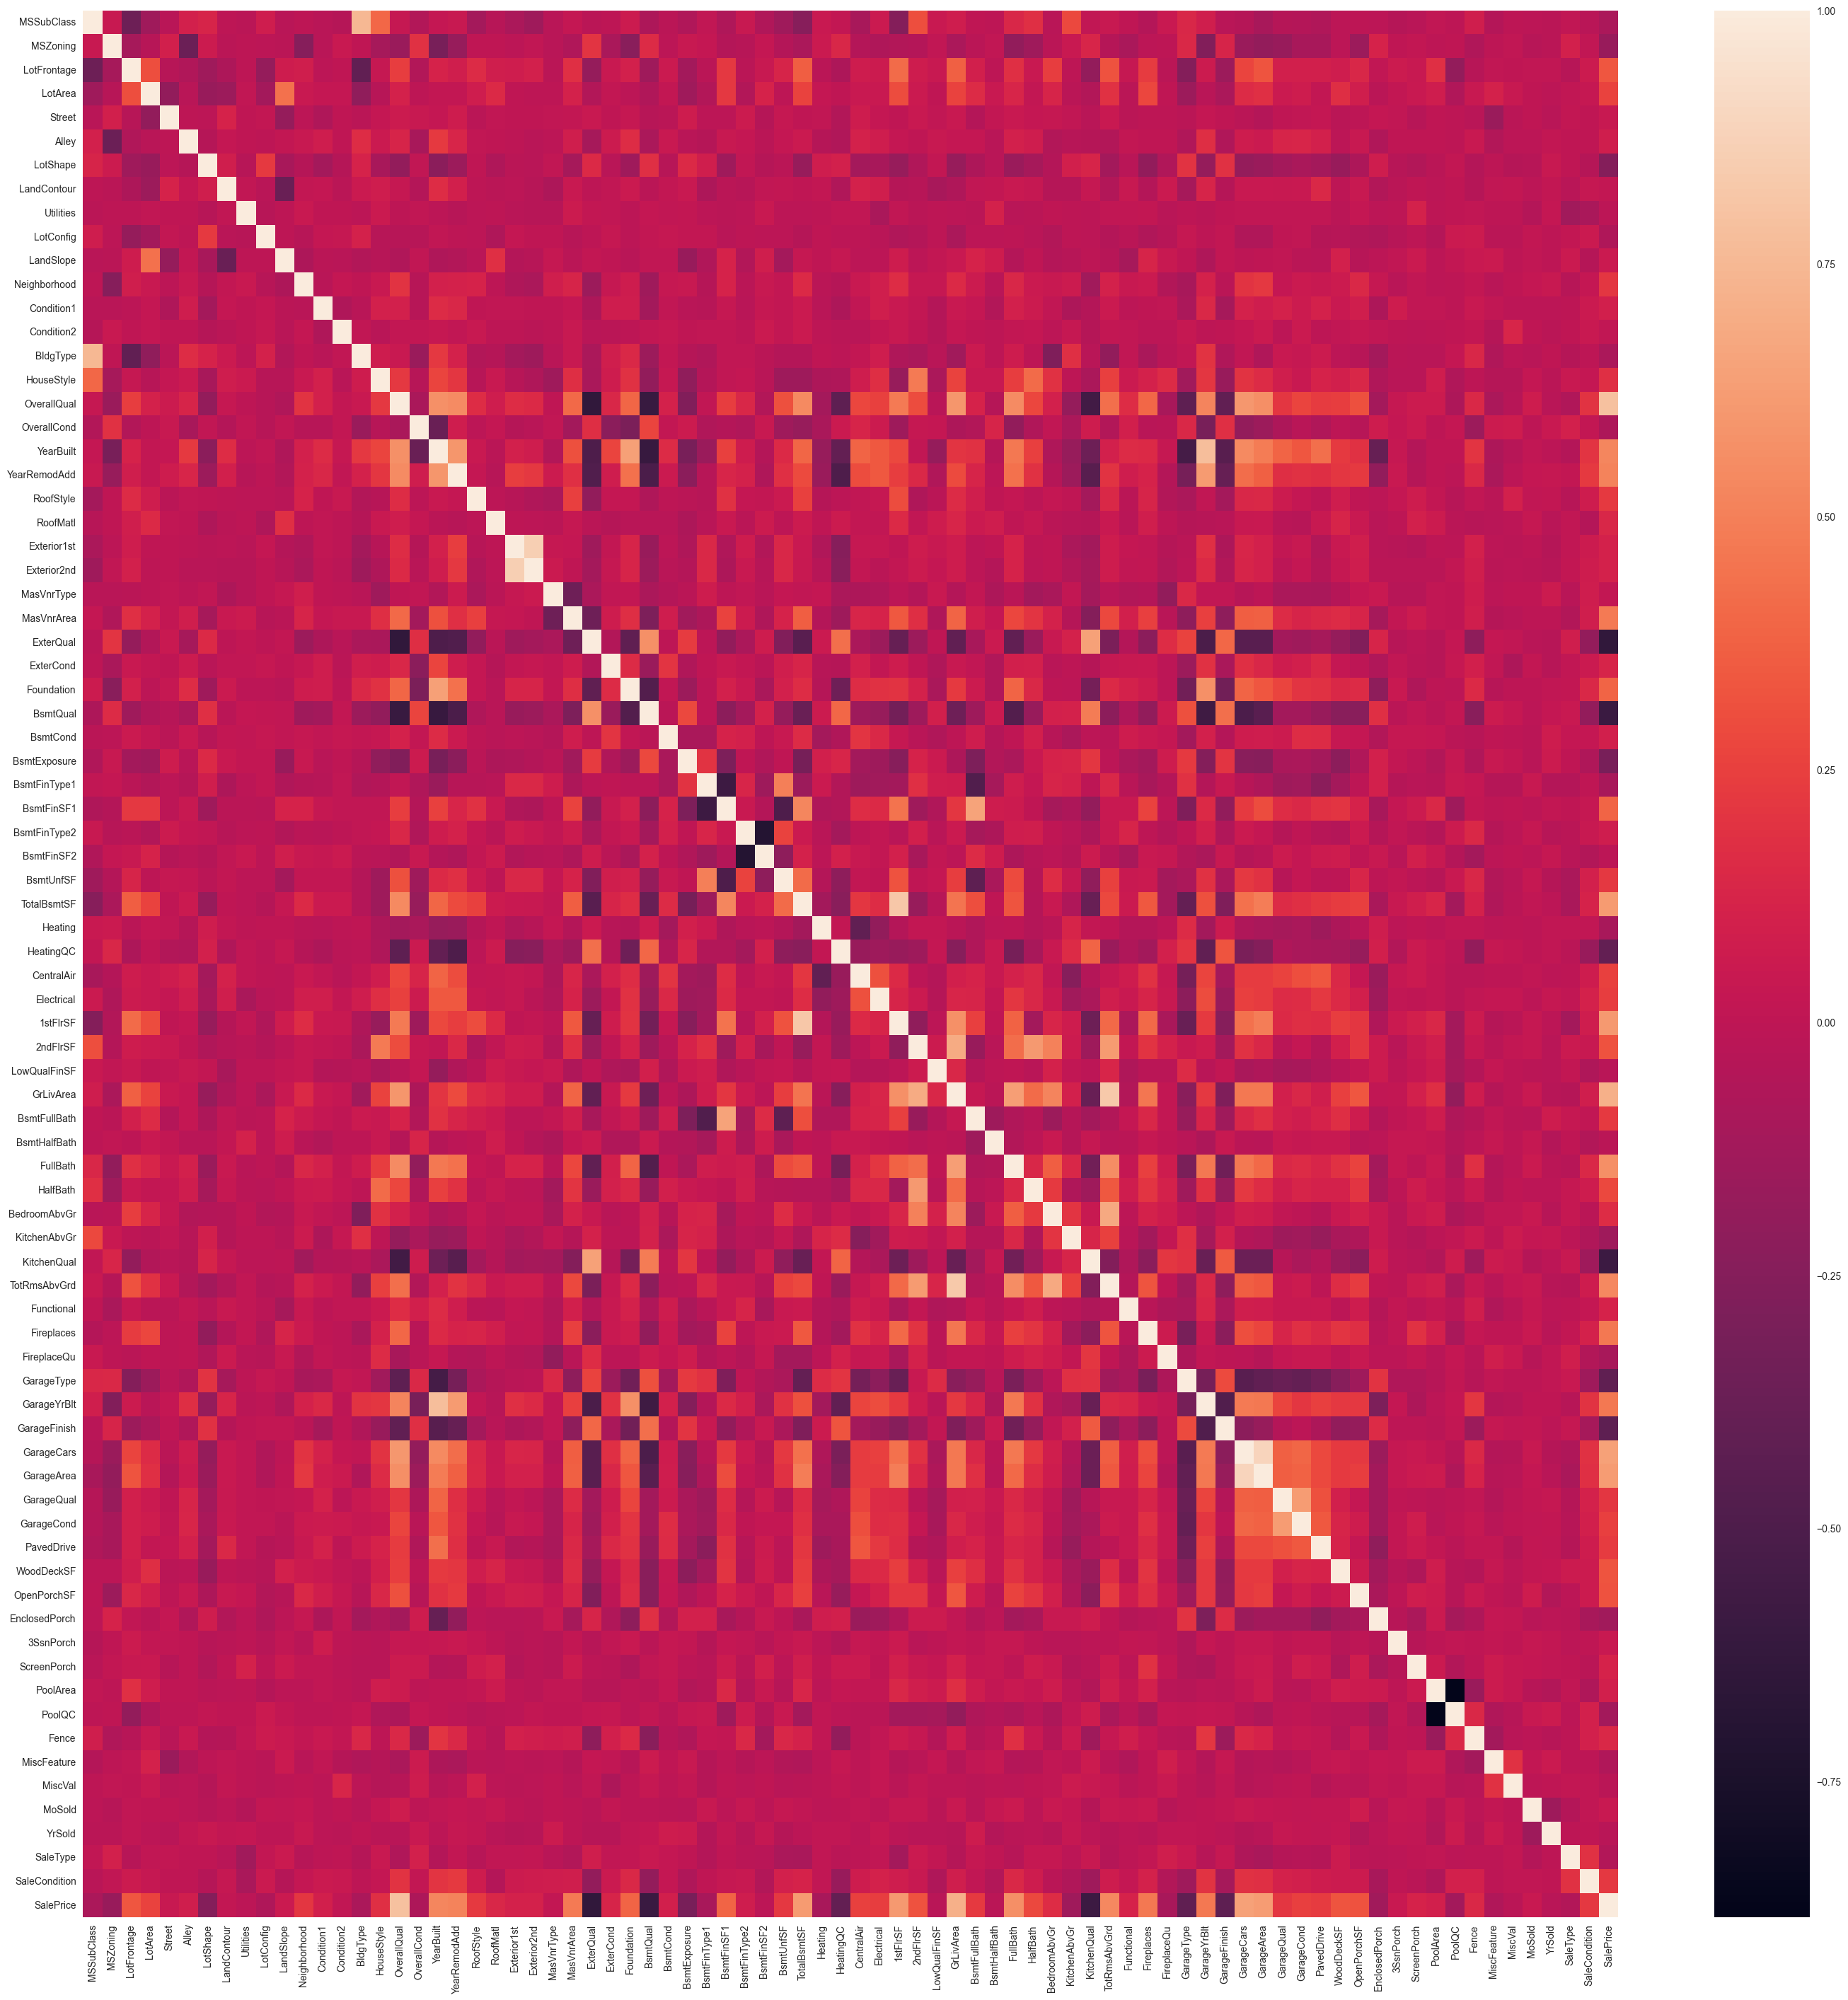

In [250]:
plt.figure(figsize=(35, 35))
corr = df.corr(method = 'pearson')

sns.heatmap(corr)
plt.show()

In [233]:
# Variáveis com maior correlação com SalePrice
top10 = corr['SalePrice'].abs().sort_values(ascending=False).head(11)
top10

SalePrice      1.000000
OverallQual    0.790982
GrLivArea      0.708624
GarageCars     0.640409
ExterQual      0.636884
GarageArea     0.623431
TotalBsmtSF    0.613581
1stFlrSF       0.605852
BsmtQual       0.593734
KitchenQual    0.589189
FullBath       0.560664
Name: SalePrice, dtype: float64

In [337]:
# Calcula a matriz de correlação com 'SalePrice'
#corr_with_saleprice = df.corrwith(df['SalePrice'])

# Seleciona apenas as colunas que têm correlação maior que 0.01 com 'SalePrice'
#correlated_columns = corr_with_saleprice[abs(corr_with_saleprice) > 0.1].index

# Cria um novo DataFrame com as colunas selecionadas
#df = df[correlated_columns]


**Train Test Split**

In [355]:
X = df.drop(columns=["SalePrice"])
y = df['SalePrice']

In [356]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

**Normalização**

In [357]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

## Modelagem

O PyCaret foi inicialmente empregado como uma ferramenta para obter uma ideia inicial do desempenho potencial dos vários modelos de Machine Learning. Esta escolha foi baseada na capacidade do PyCaret de explorar rapidamente vários algoritmos e suas configurações padrão. No entanto, como o principal objetivo era praticar e aprimorar os conhecimentos em modelagem de Machine Learning, os modelos foram montados manualmente posteriormente. 

### **Pycaret**

In [104]:
import pycaret
from pycaret.regression import *

In [105]:
# setup
caret_df = setup(data = df, target = "SalePrice", session_id=55)

In [106]:
# modelos
best_models = compare_models()

Processing:   0%|          | 0/81 [00:00<?, ?it/s]

### **Modelos**

In [ ]:
# funcao que reproduz a curva de aprendizado
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure(figsize=(10, 6))
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

**Regressão Linear**

A regressão linear é um método estatístico utilizado para modelar a relação entre uma variável dependente (ou resposta) e uma ou mais variáveis independentes (ou preditoras). O objetivo é encontrar a melhor linha reta que represente essa relação de forma adequada.

In [85]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [257]:
lm = LinearRegression()
lm.fit(X_train,y_train)
predictions = lm.predict(X_test)

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 20932.535497786503
MSE: 1834463448.327826
RMSE: 42830.636795731


**Regressao Ridge**

A regressão Ridge é uma técnica de regressão linear que adiciona uma penalidade aos coeficientes do modelo para evitar overfitting. Isso é feito adicionando o termo de regularização L2 à função de custo, o que suaviza os coeficientes, reduzindo sua magnitude.

In [280]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

ridge = Ridge()
# Definindo os parâmetros para o grid search
param_grid = {'alpha': [0.01, 10.0, 100.0, 200.0]}

# Realizando o grid search com validação cruzada
grid_search = GridSearchCV(ridge, param_grid, cv=5)
grid_search.fit(X_train, y_train)
predictions = grid_search.predict(X_test)

# Melhores parâmetros encontrados
print("Melhores parâmetros:", grid_search.best_params_)

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

Melhores parâmetros: {'alpha': 200.0}
MAE: 19365.80566878426
MSE: 1867165786.459101
RMSE: 43210.71379252026


<module 'matplotlib.pyplot' from 'C:\\Users\\CamilaHiura\\Downloads\\Anaconda\\Lib\\site-packages\\matplotlib\\pyplot.py'>

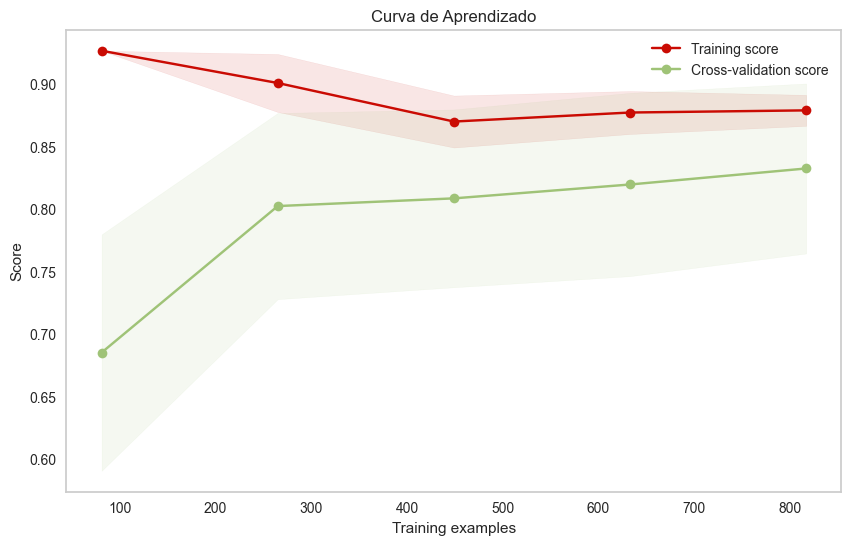

In [281]:
# curva de aprendizado
plot_learning_curve(grid_search, "Curva de Aprendizado", X_train, y_train, cv=5, n_jobs=-1)

**Regressão Lasso**

A regressão Lasso] é uma técnica de regressão linear que adiciona uma penalidade L1 aos coeficientes do modelo.

In [292]:
from sklearn.linear_model import Lasso

lasso = Lasso()

# Definindo os valores dos parâmetros a serem testados
param_grid = {'alpha': [0.001, 10.0, 100.0, 1000.0]}  

# Realizando o grid search com validação cruzada
grid_search = GridSearchCV(lasso, param_grid, cv=5)
grid_search.fit(X_train, y_train)
predictions = grid_search.predict(X_test)

# Melhores parâmetros encontrados
print("Melhores parâmetros:", grid_search.best_params_)

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

Melhores parâmetros: {'alpha': 1000.0}
MAE: 19427.679783018953
MSE: 1860380071.6309323
RMSE: 43132.12343058167


<module 'matplotlib.pyplot' from 'C:\\Users\\CamilaHiura\\Downloads\\Anaconda\\Lib\\site-packages\\matplotlib\\pyplot.py'>

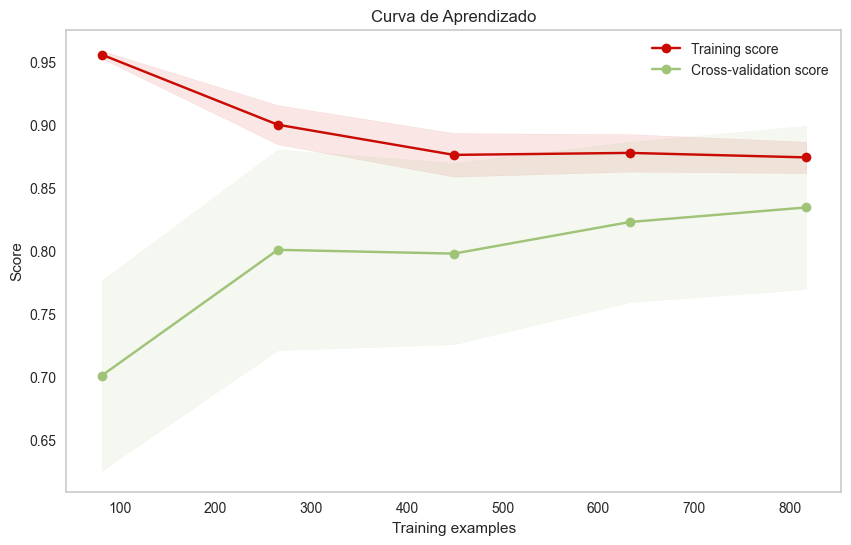

In [293]:
# curva de aprendizado
plot_learning_curve(grid_search, "Curva de Aprendizado", X_train, y_train, cv=5, n_jobs=-1)

### **Esemble**

**Random Forest**

O Random Forest é um algoritmo baseado em árvores de decisão que utiliza a técnica de ensemble learning. Ele combina múltiplas árvores de decisão individuais, treinadas com diferentes subconjuntos dos dados e/ou características, para produzir previsões mais robustas e precisas.

In [358]:
from sklearn.ensemble import RandomForestRegressor

# Inicializar e treinar o modelo Random Forest
modelo_rf = RandomForestRegressor(n_estimators=100, random_state=42)
modelo_rf.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
predictions = modelo_rf.predict(X_test)

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 18116.646872146113
MSE: 984004249.8327395
RMSE: 31368.84202250283


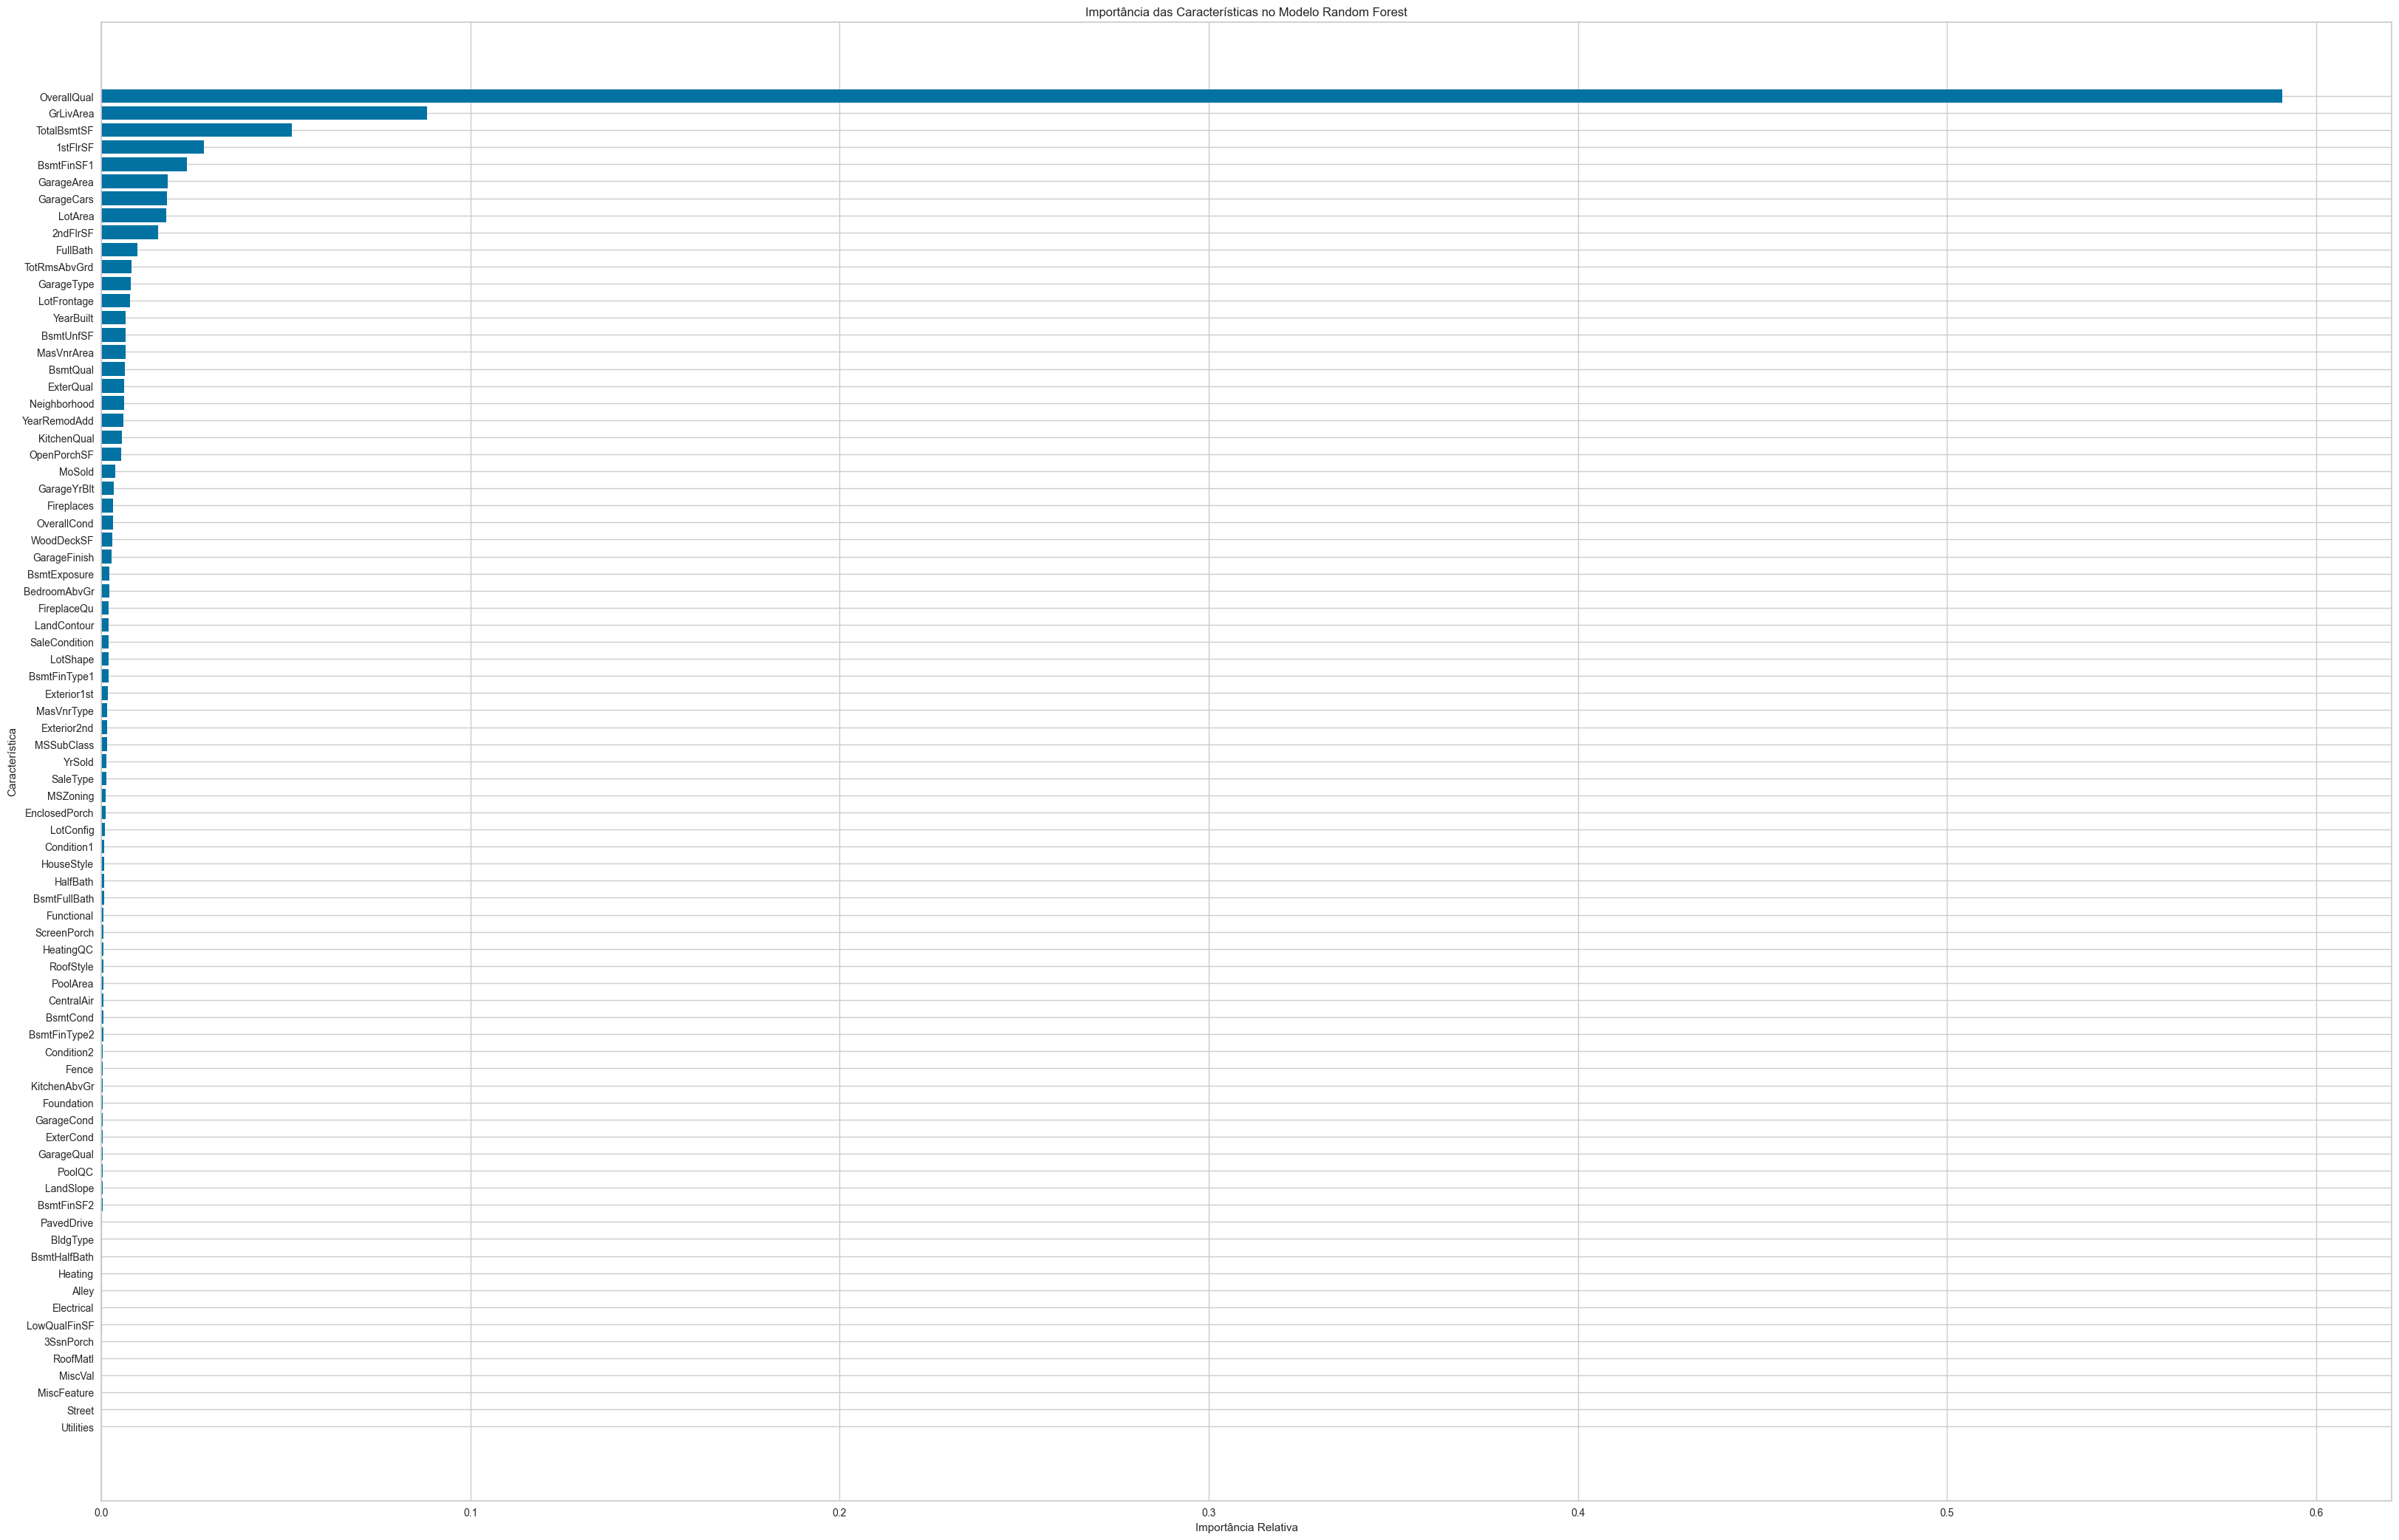

In [359]:
importances = modelo_rf.feature_importances_
features_names = list(df.drop(columns=["SalePrice"]).columns)

# Criar um DataFrame com as importâncias e os nomes das características
importances_df = pd.DataFrame({'Feature': features_names, 'Importance': importances})

# Ordenar o DataFrame por importância em ordem decrescente
importances_df = importances_df.sort_values(by='Importance', ascending=True)

# Plotar as importâncias das características
plt.figure(figsize=(40, 26))
plt.barh(range(len(importances_df)), importances_df['Importance'], align='center')
plt.yticks(range(len(importances_df)), importances_df['Feature'])  
plt.xlabel('Importância Relativa')
plt.ylabel('Característica')
plt.title('Importância das Características no Modelo Random Forest')
plt.show()

In [360]:
# Definir o limiar de importância
threshold = 0.001  # por exemplo

# Filtrar as características que passam o limiar
important_features = importances_df[importances_df['Importance'] > threshold]['Feature']

# Criar um novo DataFrame com apenas as características selecionadas
df_selected_features = df[important_features]

# Verificar as características selecionadas
df_selected_features.shape

(1460, 44)

In [361]:
x = df_selected_features
y = df['SalePrice']
x_train_testando, x_test_testando, y_train_testando, y_test_testando = train_test_split(x, y, test_size=0.3, random_state=101)

In [362]:
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [363]:
from sklearn.model_selection import GridSearchCV

# Definir os parâmetros para Grid Search
param_grid = {
    'n_estimators': [50, 100, 200],  # número de árvores na floresta
    'max_depth': [None, 10, 20],  # profundidade máxima da árvore
    'min_samples_split': [2, 5, 7],  # número mínimo de amostras necessárias para dividir um nó interno
    'min_samples_leaf': [1, 2, 4]  # número mínimo de amostras necessárias em uma folha
}

# Inicializar o regressor Random Forest
rf = RandomForestRegressor(random_state=42)

# Inicializar o Grid Search com cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, verbose=1, n_jobs=-1)

# Executar o Grid Search na sua base de dados
grid_search.fit(x_train_testando, y_train_testando)  # Substitua X_train e y_train pelos seus conjuntos de treinamento
predictions = grid_search.predict(x_test_testando)

# Melhores hiperparâmetros encontrados
best_params = grid_search.best_params_
print("Melhores Hiperparâmetros:", best_params)

# Melhor modelo encontrado pelo Grid Search
best_rf_model = grid_search.best_estimator_


Fitting 5 folds for each of 81 candidates, totalling 405 fits
Melhores Hiperparâmetros: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}


In [364]:
print('MAE:', metrics.mean_absolute_error(y_test_testando, predictions))
print('MSE:', metrics.mean_squared_error(y_test_testando, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test_testando, predictions)))

MAE: 18482.09595215198
MSE: 1008761211.7770466
RMSE: 31761.001429064647


<module 'matplotlib.pyplot' from 'C:\\Users\\CamilaHiura\\Downloads\\Anaconda\\Lib\\site-packages\\matplotlib\\pyplot.py'>

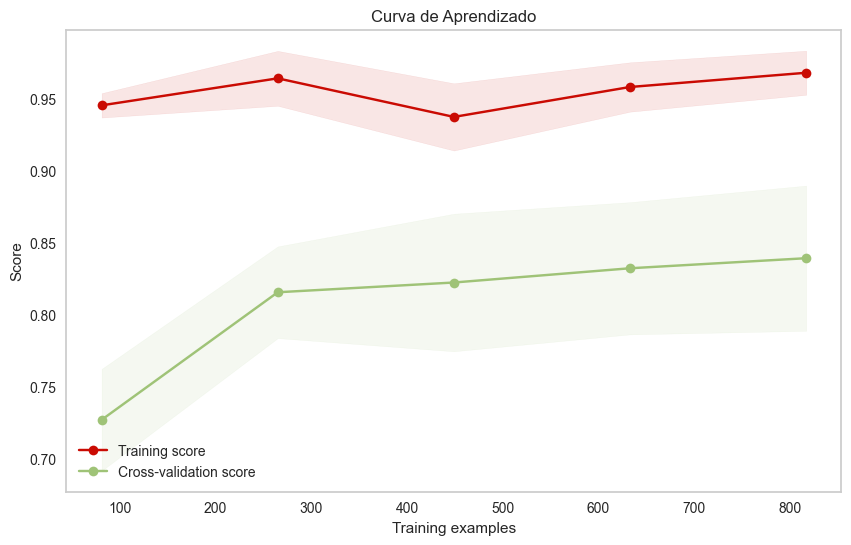

In [365]:
# curva de aprendizado
plot_learning_curve(grid_search, "Curva de Aprendizado", X_train, y_train, cv=5, n_jobs=-1)

**XGBoosting**

O XGBoosting utiliza o algoritmo de boosting para construir uma sequência de modelos de árvore de decisão, onde cada novo modelo é treinado para corrigir os erros do modelo anterior. 

In [300]:
import xgboost as xg 

xgb_r = xg.XGBRegressor(objective ='reg:squarederror', 
                  n_estimators = 10, seed = 123) 
  
xgb_r.fit(X_train, y_train) 
predictions = xgb_r.predict(X_test) 
  
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 19571.37908461758
MSE: 949795490.3040004
RMSE: 30818.752250926715


In [302]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.3],
    'n_estimators': [50, 100, 150]
}


xgb_r = xg.XGBRegressor(objective ='reg:squarederror', seed=123)

grid_search = GridSearchCV(estimator=xgb_r, param_grid=param_grid, cv=5, verbose=1)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Best Parameters:", best_params)

best_model = grid_search.best_estimator_
predictions = best_model.predict(X_test)

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 150}
MAE: 16067.966814711757
MSE: 634608923.8167657
RMSE: 25191.44544913542


<module 'matplotlib.pyplot' from 'C:\\Users\\CamilaHiura\\Downloads\\Anaconda\\Lib\\site-packages\\matplotlib\\pyplot.py'>

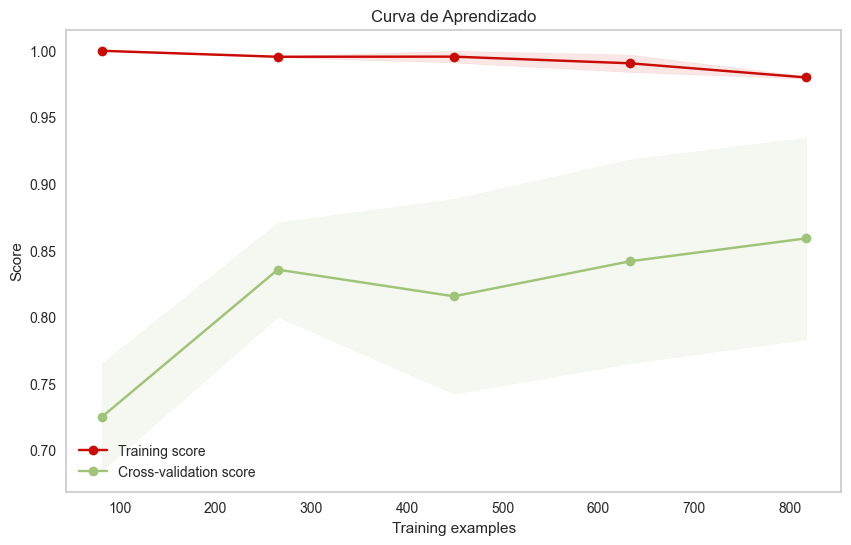

In [303]:
# curva de aprendizado
plot_learning_curve(grid_search, "Curva de Aprendizado", X_train, y_train, cv=5, n_jobs=-1)

**LightGBM**

O LightGBM (Light Gradient Boosting Machine) é uma biblioteca de aprendizado de máquina baseada em árvores de decisão, semelhante ao XGBoost, mas projetada para eficiência e escalabilidade. Ele utiliza o algoritmo de boosting para construir um conjunto de modelos de árvore de decisão, em que cada árvore é treinada para corrigir os erros do modelo anterior.

In [294]:
import lightgbm as lgb

params = {
    'objective': 'regression',
    'metric': 'mse',
    'num_leaves': 50,
    'learning_rate': 0.05,
    'feature_fraction': 0.9
}

train_data = lgb.Dataset(X_train,y_train)
lightgbm = lgb.train(params, train_data, num_boost_round=100)
y_pred = lightgbm.predict(X_test)

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001890 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2999
[LightGBM] [Info] Number of data points in the train set: 1022, number of used features: 70
[LightGBM] [Info] Start training from score 181608.593933
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

In [298]:
param_grid = {
    'num_leaves': [20, 30, 40],
    'learning_rate': [0.05, 0.1, 0.2],
    'n_estimators': [50, 100, 150]
}

lgbm = lgb.LGBMRegressor()

grid_search = GridSearchCV(estimator=lgbm, param_grid=param_grid, cv=5, verbose=1)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Best Parameters:", best_params)

best_model = grid_search.best_estimator_
predictions = best_model.predict(X_test)

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000934 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2800
[LightGBM] [Info] Number of data points in the train set: 817, number of used features: 70
[LightGBM] [Info] Start training from score 180645.762546
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000886 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2806
[LightGBM] [Info] Number of data points in the train set: 817, number of used features: 70
[LightGBM] [Info] Start training from score 179730.864137
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000377 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not e

In [ ]:
plt.scatter(y_test,predictions, c='cornflowerblue', edgecolor = "white")
plt.xlabel("Valores Reais")
plt.ylabel("Previsões")
plt.title("Gráfico de Previsões vs. Valores Reais")
plt.grid(None)
plt.show()

<module 'matplotlib.pyplot' from 'C:\\Users\\CamilaHiura\\Downloads\\Anaconda\\Lib\\site-packages\\matplotlib\\pyplot.py'>

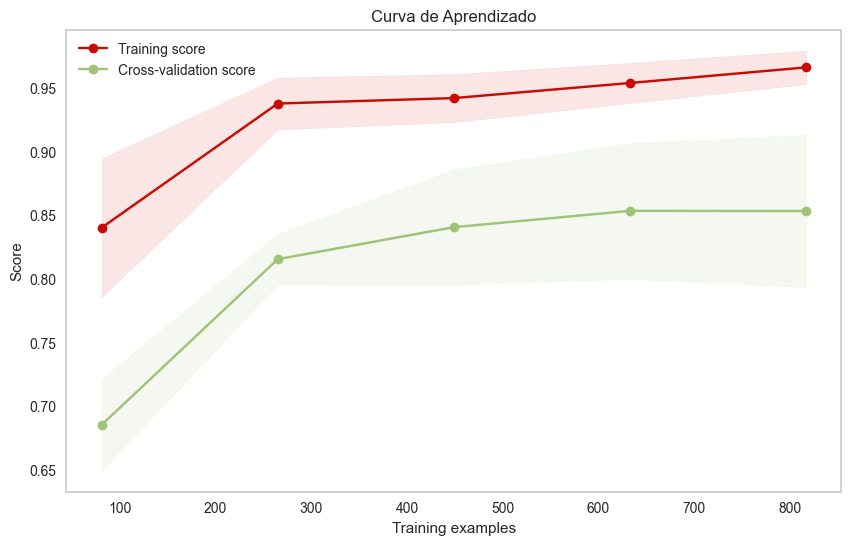

In [299]:
# curva de aprendizado
plot_learning_curve(grid_search, "Curva de Aprendizado", X_train, y_train, cv=5, n_jobs=-1)